Link: https://drive.google.com/file/d/1PFMY5rLBvk9EU-kJ2ccqQgqvd4GsSVLU/view?usp=sharing

# Q1.  Data preprocessing

In this question i pre-processed the credit card data that is given and used power transformation. Then i made a correlation map for the values to find which have higher correlation value.

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

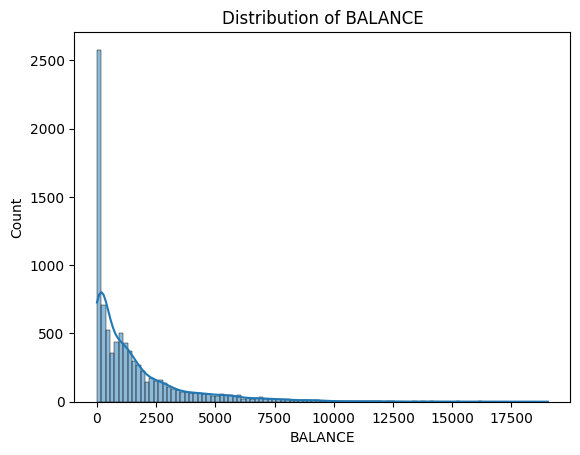

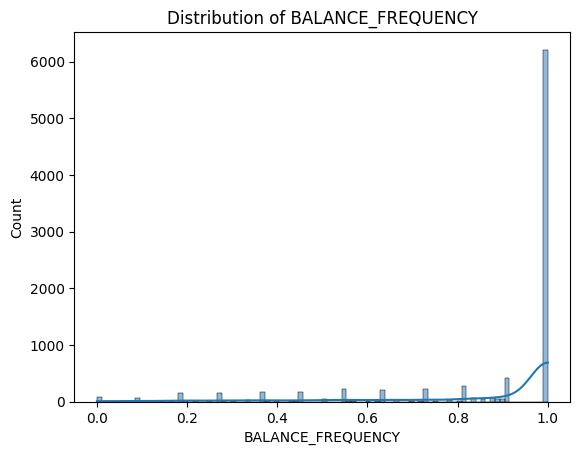

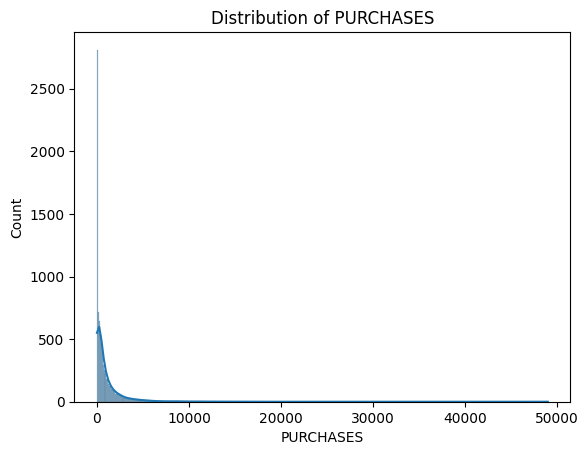

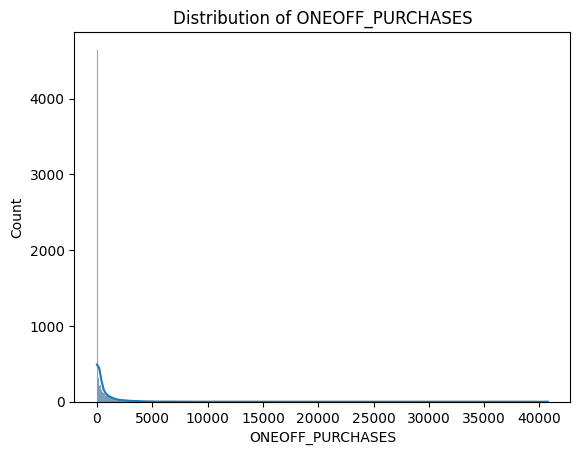

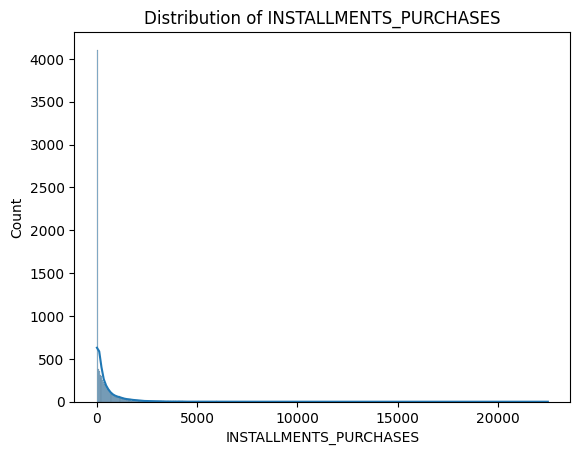

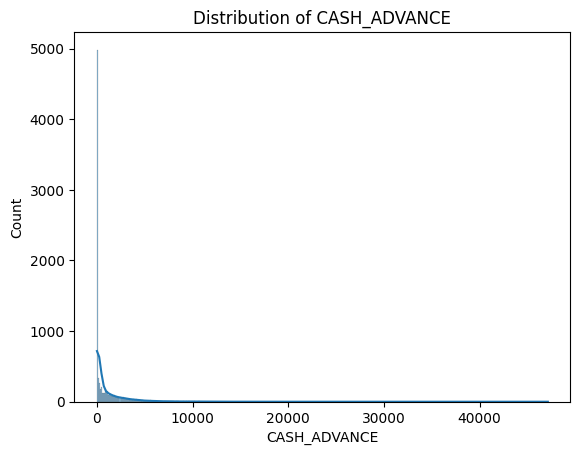

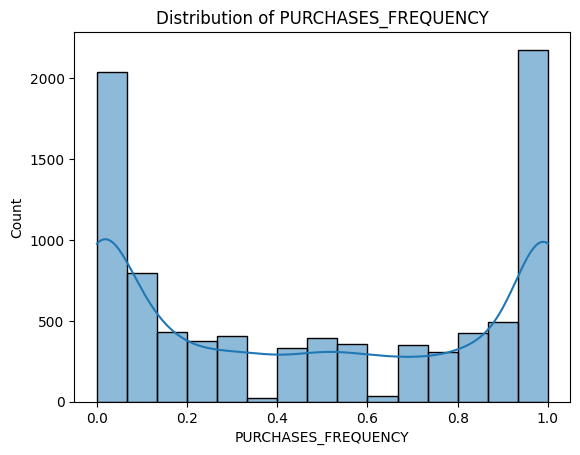

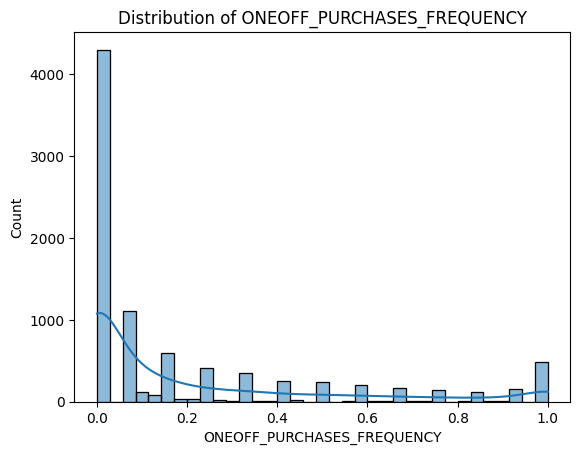

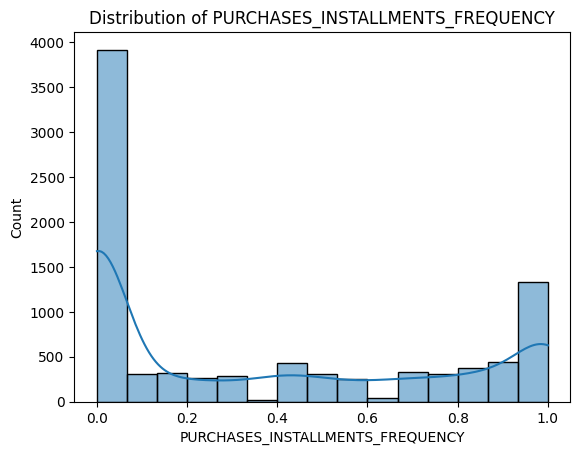

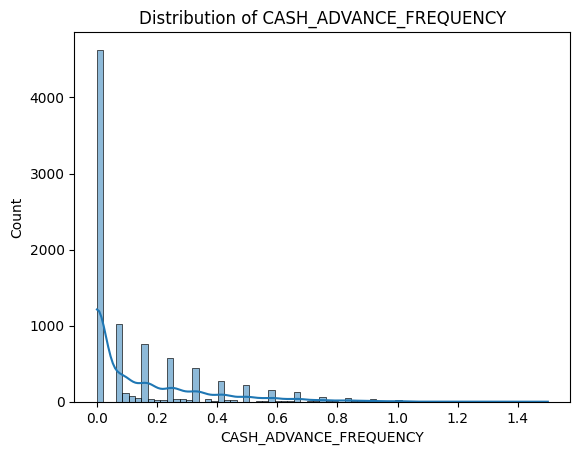

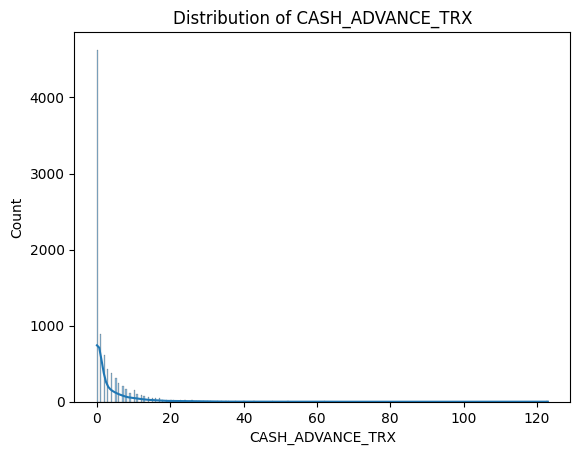

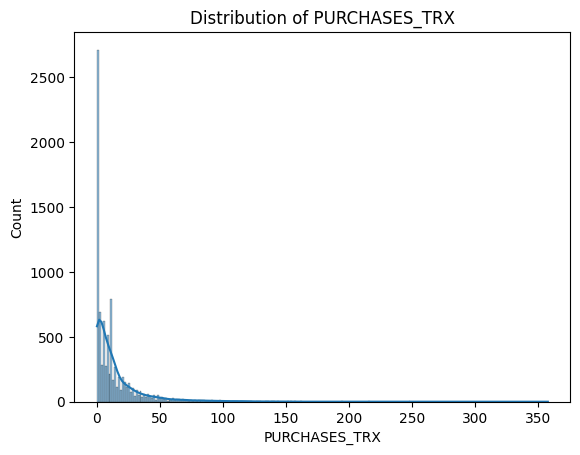

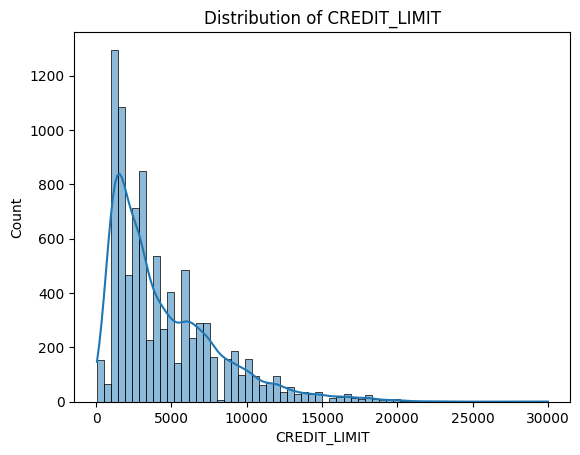

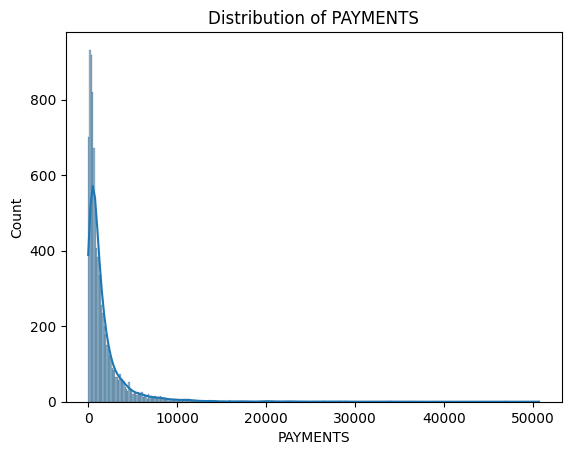

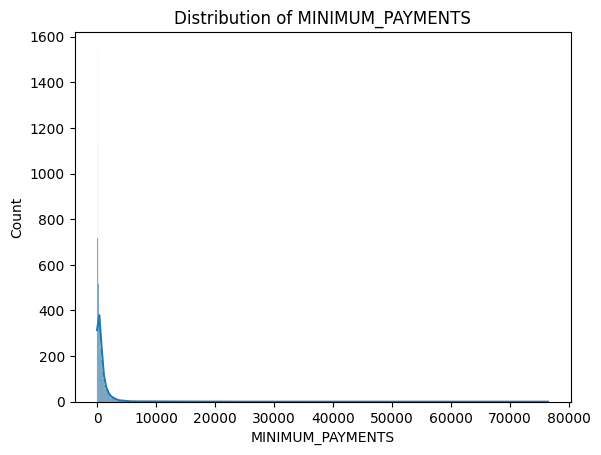

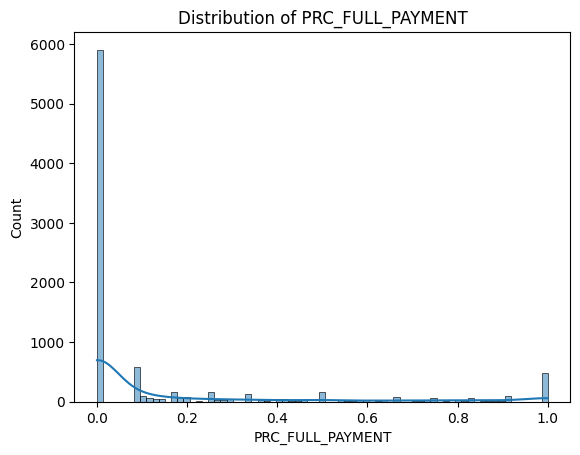

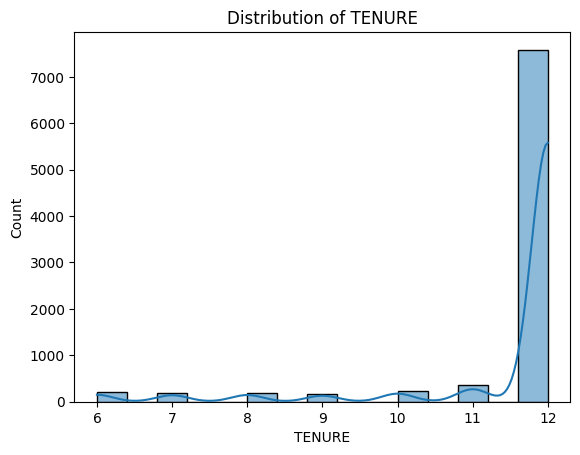

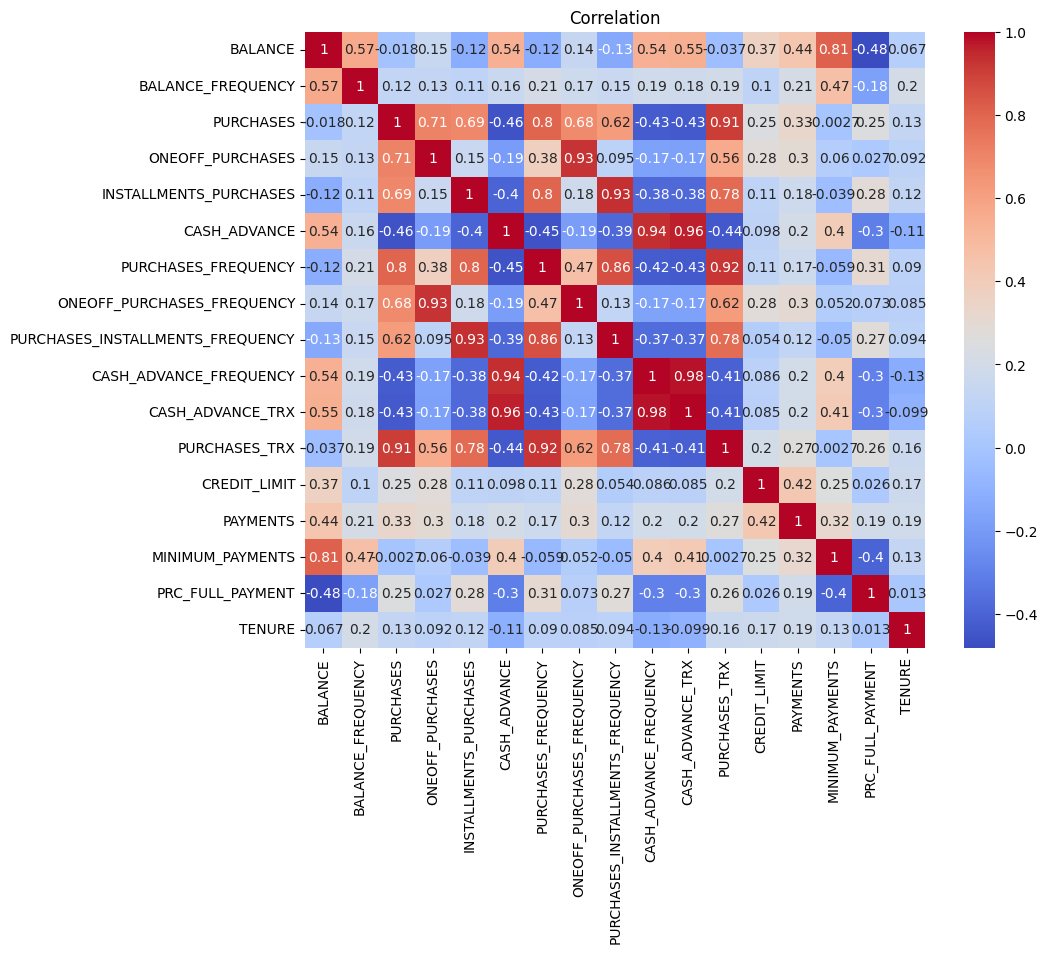

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler

# Data overview
data = pd.read_csv('Customer-Data - 2.csv')
print(data.head())
print(data.info())
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Handling missing values
numeric_data = data.select_dtypes(include=[np.number])
data[numeric_data.columns] = numeric_data.fillna(numeric_data.median())

# Visualize distributions
for col in data.select_dtypes(include=[np.number]).columns:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Required Power transformation
transformer = PowerTransformer()
transformed_data = transformer.fit_transform(data.select_dtypes(include=[np.number]))
data_transformed = pd.DataFrame(transformed_data, columns=data.select_dtypes(include=[np.number]).columns)

# Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data_transformed.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation")
plt.show()

# Drop highly correlated features
threshold = 0.85
correlation_matrix = data_transformed.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
data_transformed = data_transformed.drop(columns=to_drop)

# Q2. Clustering

Here i did clustering with the help of K-Means and DBScan. With the help of t-SNE, i got the visualization of the cluster formation.

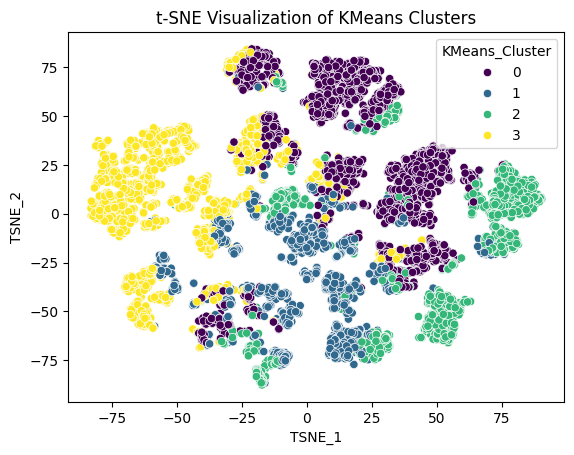

In [9]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE

# K-Means clustering
inertia = []
range_k = range(2, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_transformed)
    inertia.append(kmeans.inertia_)

# Train KMeans with optimal K
optimal_k = 4  # Replace with the identified value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_transformed['KMeans_Cluster'] = kmeans.fit_predict(data_transformed)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on observations
data_transformed['DBSCAN_Cluster'] = dbscan.fit_predict(data_transformed)

# Visualize clusters with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_transformed.drop(['KMeans_Cluster', 'DBSCAN_Cluster'], axis=1))
data_transformed['TSNE_1'] = tsne_results[:, 0]
data_transformed['TSNE_2'] = tsne_results[:, 1]

sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='KMeans_Cluster', data=data_transformed, palette='viridis')
plt.title("t-SNE Visualization of KMeans Clusters")
plt.show()


# Q3.  PCA

After normalizing the different values, a plot of variance of versus the PCA dimensions was taken to check for the MSE that is generated by the values.

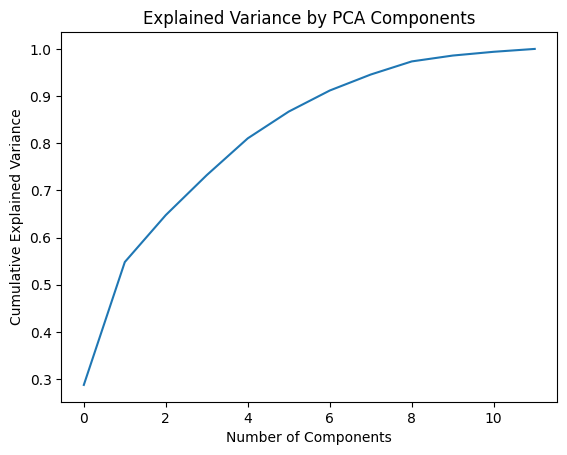

Mean Squared Error with 5 components: 0.18956247604964546


In [10]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_transformed.drop(['KMeans_Cluster', 'DBSCAN_Cluster', 'TSNE_1', 'TSNE_2'], axis=1))

# Train PCA
pca = PCA()
pca.fit(scaled_data)

# Variance explained plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

# Reconstruct data with reduced dimensions
n_components = 5  # Select based on explained variance
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(scaled_data)
data_reconstructed = pca.inverse_transform(data_reduced)

# Compute reconstruction error
mse = mean_squared_error(scaled_data, data_reconstructed)
print(f'Mean Squared Error with {n_components} components: {mse}')


# References

1. ChatGPT: data pre processing code
2. ChatGPT: use a power transformer
3. ChatGPT: how to check if value is highly correlated code
4. ChatGPT: clustering by k means, dbscan visualizing with tsne
5. ChatGPT: find the pca and find variance
6. ChatGPT: find the mse